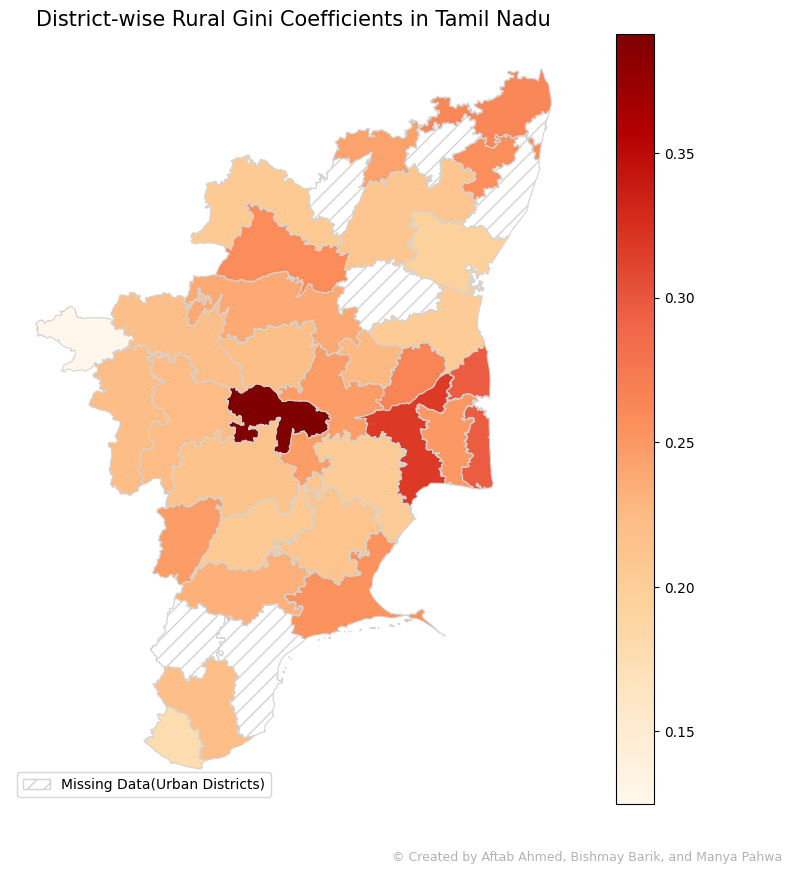

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import process
import matplotlib.patches as mpatches

# Load the district Gini data
gini_data = pd.read_csv('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment_ABM/02. Output/Shapefile/dist_gini.csv')

# Load the shapefile
tn_shapefile = gpd.read_file('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment_ABM/02. Output/Shapefile/TN_Shapefile/tamil_nadu.shp')

# Normalize the district names (lowercase, strip spaces)
gini_data['district_name'] = gini_data['district_name'].str.lower().str.strip()
tn_shapefile['Name'] = tn_shapefile['Name'].str.lower().str.strip()

# Create a dictionary to store the best matches
best_matches = {}

# Find the best match for each district in gini_data using fuzzy matching
for district in gini_data['district_name']:
    match = process.extractOne(district, tn_shapefile['Name'], score_cutoff=00)  # Set a score cutoff to avoid poor matches
    if match:
        best_matches[district] = match[0]

# Create a new column in gini_data for the matched district names
gini_data['matched_district'] = gini_data['district_name'].map(best_matches)

# Perform a left join to keep all districts from the shapefile
merged_data = tn_shapefile.merge(gini_data, left_on='Name', right_on='matched_district', how='left')

# Replace missing Gini coefficients and zero coefficients with NaN for shading purposes
merged_data['gini_district'] = merged_data['gini_district'].replace(0, float('nan'))

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot with a color for missing/zero-coefficient districts and light gray hatch for shading
merged_data.plot(
    column='gini_district',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='lightgray',         # Light gray border for all districts
    legend=True,
    missing_kwds={
        'color': 'white',           # Fill color for missing data
        'edgecolor': 'lightgray',   # Light gray edge color for missing data regions
        'hatch': '//'               # Hatch pattern for missing data
    }
)

# Add title and remove axis
ax.set_title('District-wise Rural Gini Coefficients in Tamil Nadu', fontsize=15)
plt.axis('off')  # Turn off the axis

# Add a custom legend item for the hatched regions
missing_data_legend = mpatches.Patch(facecolor='white', edgecolor='lightgray', hatch='//', label='Missing Data(Urban Districts)')
plt.legend(handles=[missing_data_legend], loc='lower left')

# Add copyright watermark in the bottom right corner
plt.text(
    0.95, 0.05, '© Created by Aftab Ahmed, Bishmay Barik, and Manya Pahwa',
    fontsize=9, color='gray', ha='right', va='bottom', transform=plt.gcf().transFigure,
    alpha=0.6
)

# Save the figure
plt.savefig('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment_ABM/04. Latex/Figures/rural_tamil_nadu_gini_map_orange_lightgray_borders.png', dpi=300)

plt.show()


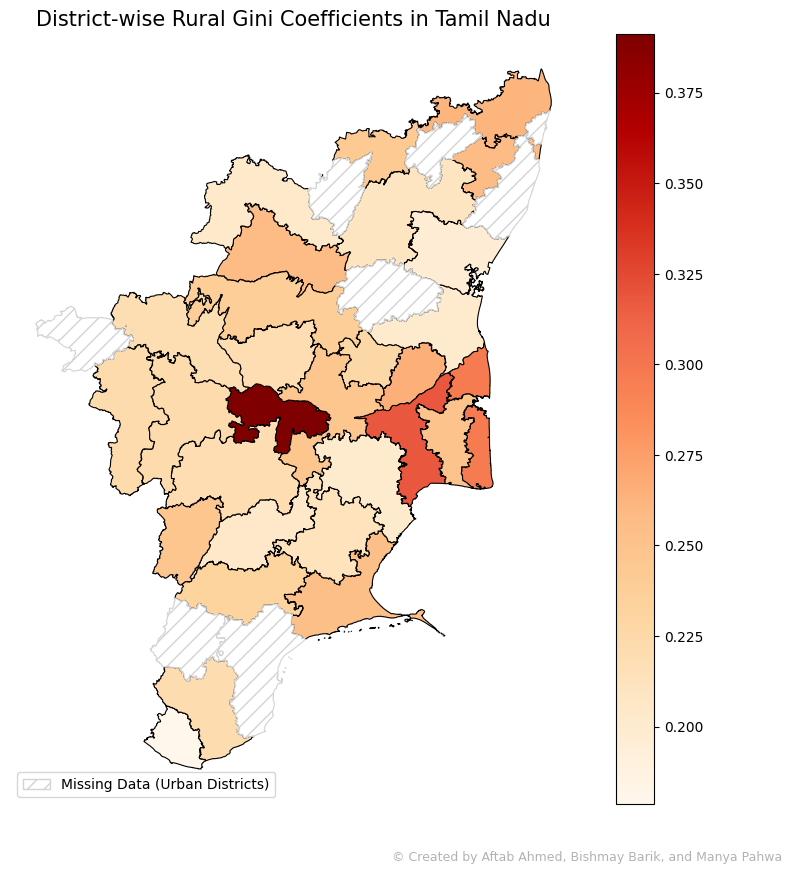

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import process
import matplotlib.patches as mpatches

# Load the district Gini data
gini_data = pd.read_csv('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment/02. Output/Shapefile/dist_gini.csv')

# Load the shapefile
tn_shapefile = gpd.read_file('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment/02. Output/Shapefile/TN_Shapefile/tamil_nadu.shp')

# Normalize the district names (lowercase, strip spaces)
gini_data['district_name'] = gini_data['district_name'].str.lower().str.strip()
tn_shapefile['Name'] = tn_shapefile['Name'].str.lower().str.strip()

# Create a dictionary to store the best matches
best_matches = {}

# Find the best match for each district in gini_data using fuzzy matching
for district in gini_data['district_name']:
    match = process.extractOne(district, tn_shapefile['Name'], score_cutoff=80)  # Set a score cutoff to avoid poor matches
    if match:
        best_matches[district] = match[0]

# Create a new column in gini_data for the matched district names
gini_data['matched_district'] = gini_data['district_name'].map(best_matches)

# Perform a left join to keep all districts from the shapefile
merged_data = tn_shapefile.merge(gini_data, left_on='Name', right_on='matched_district', how='left')

# Replace missing Gini coefficients and zero coefficients with NaN for shading purposes
merged_data['gini_district'] = merged_data['gini_district'].replace(0, float('nan'))

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot with a color for missing/zero-coefficient districts and light gray hatch for shading
merged_data.plot(
    column='gini_district',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='black',             # Black border for all districts
    legend=True,
    missing_kwds={
        'color': 'white',           # Fill color for missing data
        'edgecolor': 'lightgray',   # Light gray edge color for missing data regions
        'hatch': '//'               # Hatch pattern for missing data
    }
)

# Add title and remove axis
ax.set_title('District-wise Rural Gini Coefficients in Tamil Nadu', fontsize=15)
plt.axis('off')  # Turn off the axis

# Add a custom legend item for the hatched regions
missing_data_legend = mpatches.Patch(facecolor='white', edgecolor='lightgray', hatch='//', label='Missing Data (Urban Districts)')
plt.legend(handles=[missing_data_legend], loc='lower left')

# Add copyright watermark in the bottom right corner
plt.text(
    0.95, 0.05, '© Created by Aftab Ahmed, Bishmay Barik, and Manya Pahwa',
    fontsize=9, color='gray', ha='right', va='bottom', transform=plt.gcf().transFigure,
    alpha=0.6
)

# Save the figure
plt.savefig('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment/04. Latex/Figures/rural_tamil_nadu_gini_map_orange_black_borders.png', dpi=300)

plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


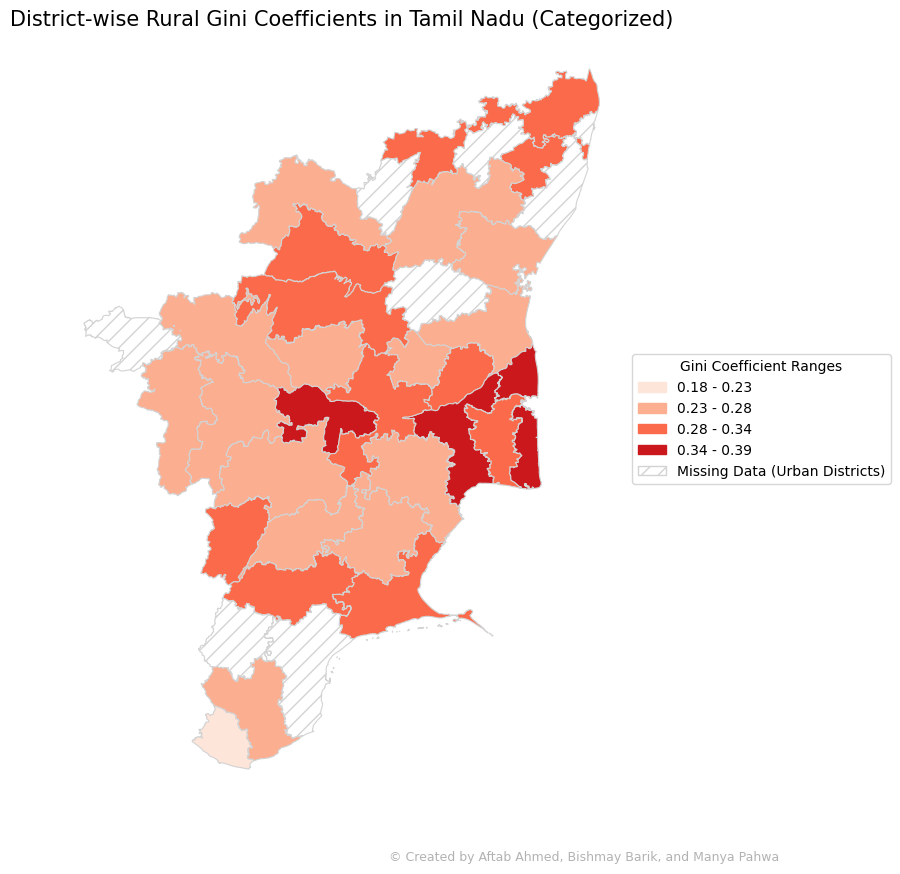

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import process
import matplotlib.patches as mpatches
import numpy as np

# Load the district Gini data
gini_data = pd.read_csv('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment/02. Output/Shapefile/dist_gini.csv')

# Load the shapefile
tn_shapefile = gpd.read_file('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment/02. Output/Shapefile/TN_Shapefile/tamil_nadu.shp')

# Normalize the district names (lowercase, strip spaces)
gini_data['district_name'] = gini_data['district_name'].str.lower().str.strip()
tn_shapefile['Name'] = tn_shapefile['Name'].str.lower().str.strip()

# Create a dictionary to store the best matches
best_matches = {}

# Find the best match for each district in gini_data using fuzzy matching
for district in gini_data['district_name']:
    match = process.extractOne(district, tn_shapefile['Name'], score_cutoff=80)
    if match:
        best_matches[district] = match[0]

# Create a new column in gini_data for the matched district names
gini_data['matched_district'] = gini_data['district_name'].map(best_matches)

# Perform a left join to keep all districts from the shapefile
merged_data = tn_shapefile.merge(gini_data, left_on='Name', right_on='matched_district', how='left')

# Replace missing Gini coefficients and zero coefficients with NaN for shading purposes
merged_data['gini_district'] = merged_data['gini_district'].replace(0, float('nan'))

# Calculate the minimum and maximum Gini values
min_gini = merged_data['gini_district'].min()
max_gini = merged_data['gini_district'].max()

# Create four bins based on the min and max Gini values
bins = np.linspace(min_gini, max_gini, 5)  # 5 edges for 4 bins
colors = ['#fee5d9', '#fcae91', '#fb6a4a', '#cb181d']  # Shades of orange and red for the categories
labels = [f'{bins[i]:.2f} - {bins[i+1]:.2f}' for i in range(len(bins)-1)]  # Labels for the legend

# Create a colormap using the defined colors
cmap = plt.cm.colors.ListedColormap(colors)

# Plot the heatmap with four discrete colors based on Gini ranges
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot using defined bins and colors
merged_data.plot(
    column='gini_district',
    cmap=cmap,
    linewidth=0.8,
    ax=ax,
    edgecolor='lightgray',
    legend=False,  # Disable automatic legend
    scheme='UserDefined',
    classification_kwds={'bins': bins},
    missing_kwds={
        'color': 'white',
        'edgecolor': 'lightgray',
        'hatch': '//'
    }
)

# Add centered title and remove axis
ax.set_title('District-wise Rural Gini Coefficients in Tamil Nadu (Categorized)', fontsize=15, loc='center')
plt.axis('off')

# Add a custom legend for Gini coefficient ranges
handles_gini = [
    mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors))
]

# Add a custom legend item for the hatched regions (missing data)
handles_missing = [mpatches.Patch(facecolor='white', edgecolor='lightgray', hatch='//', label='Missing Data (Urban Districts)')]

# Combine legends and add them to the plot on the right
legends = handles_gini + handles_missing
ax.legend(handles=legends, title='Gini Coefficient Ranges', loc='center left', bbox_to_anchor=(1, 0.5), frameon=True)

# Add copyright watermark
plt.text(
    0.95, 0.05, '© Created by Aftab Ahmed, Bishmay Barik, and Manya Pahwa',
    fontsize=9, color='gray', ha='right', va='bottom', transform=plt.gcf().transFigure,
    alpha=0.6
)

# Save the figure
plt.savefig('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment/04. Latex/Figures/rural_tamil_nadu_gini_map_four_colors.png', dpi=300, bbox_inches='tight')

plt.show()


In [2]:
pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 5.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import geopandas as gpd

# Load the shapefile
tn_shapefile = gpd.read_file('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment_ABM/02. Output/Shapefile/TN_Shapefile/tamil_nadu.shp')

# Check column names to find the one containing district names
print(tn_shapefile.columns)

Index(['Name', 'Descriptio', 'geometry'], dtype='object')


In [5]:
district_names = tn_shapefile['Name'].unique()

# Print all district names
print(district_names)

['ARIYALUR' 'CHENGALPATTU' 'CHENNAI' 'COIMBATORE' 'CUDDALORE' 'DHARMAPURI'
 'DINDIGUL' 'ERODE' 'KANCHIPURAM' 'KALLAKKURICHI' 'KANYAKUMARI' 'KARUR'
 'MADURAI' 'N|LGIRIS' 'NAGAPATTINAM' 'NAMAKKAL' 'PERAMBALUR' 'PUDUKKOTTAI'
 'RAMANATHAPURAM' 'RANIPPETTAI' 'SALEM' 'SIVAGANGA' 'TENI' 'TENKASI'
 'THANJAVUR' 'THIRUVARUR' 'TIRUCHIRAPALLI' 'TIRUNELVELI' 'TIRUPPUR'
 'TIRUPPATTUR' 'TIRUVALLUR' 'TIRUVANNAMALAI' 'TUTICORIN' 'VELLORE'
 'VILLUPURAM' 'VIRUDHUNAGAR' 'KRISHNAGIRI']


In [16]:
# Find districts in gini_data that did not match any district in the shapefile
unmatched_districts = gini_data[~gini_data['district_name'].isin(best_matches.keys())]

# Print out the unmatched districts
print("Unmatched districts in gini_data (districts missing in the shapefile):")
print(unmatched_districts['district_name'])


Unmatched districts in gini_data (districts missing in the shapefile):
Series([], Name: district_name, dtype: object)


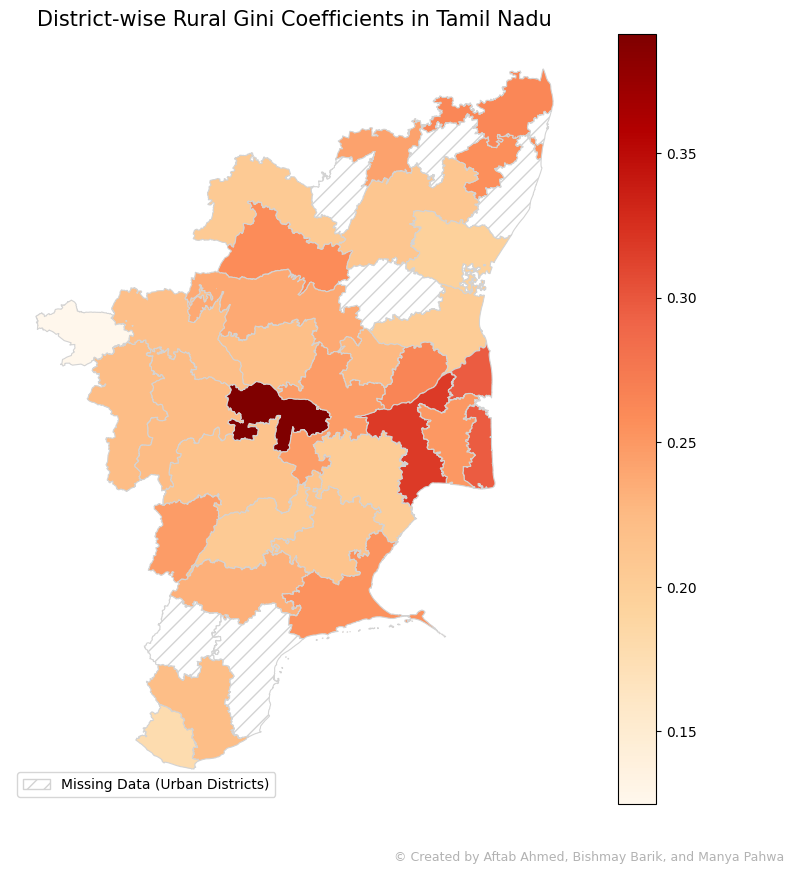

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import process
import matplotlib.patches as mpatches

# Load the district Gini data
gini_data = pd.read_csv('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment_ABM/02. Output/Shapefile/dist_gini.csv')

# Load the shapefile
tn_shapefile = gpd.read_file('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment_ABM/02. Output/Shapefile/DISTRICT_BOUNDARY/tamilnadu_final.shp')

# Normalize the district names (lowercase, strip spaces)
gini_data['district_name'] = gini_data['district_name'].str.lower().str.strip()
tn_shapefile['District'] = tn_shapefile['District'].str.lower().str.strip()

# Create a dictionary to store the best matches
best_matches = {}

# Find the best match for each district in gini_data using fuzzy matching
for district in gini_data['district_name']:
    match = process.extractOne(district, tn_shapefile['District'], score_cutoff=0)  # Set a score cutoff to avoid poor matches
    if match:
        best_matches[district] = match[0]

# Create a new column in gini_data for the matched district names
gini_data['matched_district'] = gini_data['district_name'].map(best_matches)

# Perform a left join to keep all districts from the shapefile
merged_data = tn_shapefile.merge(gini_data, left_on='District', right_on='matched_district', how='left')

# Replace missing Gini coefficients and zero coefficients with NaN for shading purposes
merged_data['gini_district'] = merged_data['gini_district'].replace(0, float('nan'))

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot with a color for missing/zero-coefficient districts and light gray hatch for shading
merged_data.plot(
    column='gini_district',
    cmap='OrRd',
    linewidth=0.8,
    ax=ax,
    edgecolor='lightgray',         # Light gray border for all districts
    legend=True,
    missing_kwds={
        'color': 'white',           # Fill color for missing data
        'edgecolor': 'lightgray',   # Light gray edge color for missing data regions
        'hatch': '//'               # Hatch pattern for missing data
    }
)

# Add title and remove axis
ax.set_title('District-wise Rural Gini Coefficients in Tamil Nadu', fontsize=15)
plt.axis('off')  # Turn off the axis

# Add a custom legend item for the hatched regions
missing_data_legend = mpatches.Patch(facecolor='white', edgecolor='lightgray', hatch='//', label='Missing Data (Urban Districts)')
plt.legend(handles=[missing_data_legend], loc='lower left')

# Add copyright watermark in the bottom right corner
plt.text(
    0.95, 0.05, '© Created by Aftab Ahmed, Bishmay Barik, and Manya Pahwa',
    fontsize=9, color='gray', ha='right', va='bottom', transform=plt.gcf().transFigure,
    alpha=0.6
)

# Save the figure
plt.savefig('/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/Discrimination_Assignment_ABM/04. Latex/Figures/rural_tamil_nadu_gini_map_orange_lightgray_borders.png', dpi=300)

plt.show()


In [18]:
print(tn_shapefile.columns)


Index(['District', 'STATE', 'REMARKS', 'State_LGD', 'DISTRICT_L', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')


In [20]:
# Print all unique district names in the tn_shapefile GeoDataFrame
print(tn_shapefile['District'].unique())


['ariyal@r' 'chengalpattu' 'chennai' 'coimbatore' 'cuddalore' 'dharmapuri'
 'dindigul' 'erode' 'k>nchipuram' 'kallakkurichi' 'kany>kumari' 'kar@r'
 'madurai' 'n|lgiris' 'n>gapattinam' 'n>makkal' 'perambal@r' 'pudukkottai'
 'r>man>thapuram' 'r>nippettai' 'salem' 'sivaganga' 'teni' 'tenkasi'
 'thanj>v@r' 'thiruv>r@r' 'tiruchir>palli' 'tirunelveli' 'tirupp@r'
 'tiruppatt@r' 'tiruvall@r' 'tiruvann>malai' 'tuticorin' 'vellore'
 'villupuram' 'virudhunagar' 'krishnagiri']
